In [73]:
import cv2
import RPi.GPIO as GPIO
import time
import numpy as np
from matplotlib import pyplot as plt

def resize_img(img, width, height):
    up_points = (width, height)
    img_resize = cv2.resize(img, up_points)
    print("NewSize",img_resize.shape)
    return img_resize
def readIMG(dir):
    img = cv2.imread(dir)
    print("OriginalSize",img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
    
def rotate_image(image, degrees):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, degrees, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def cut(resized_image):
    height, width = resized_image.shape[:2]
    half_height = height // 2
    upper_half = resized_image[:half_height, :]
    lower_half = resized_image[half_height:, :]

    half_width = width // 2
    left_half = resized_image[:, :half_width]
    right_half = resized_image[:, half_width:]
    return left_half,right_half,upper_half,lower_half

OriginalSize (1200, 1200, 3)
NewSize (1000, 1000, 3)


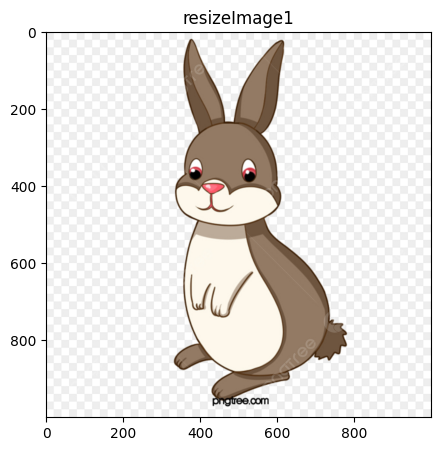

In [33]:

img = cv2.imread("conejo2.jpg")
print("OriginalSize",img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resizeimg = resize_img(img, 1000, 1000)

print("NewSize",resizeimg.shape)
plt.figure(figsize=(5,5))
plt.title("resizeImage1")
plt.imshow(resizeimg)



1.small
2.medium
3.big
NewSize (100, 100, 3)


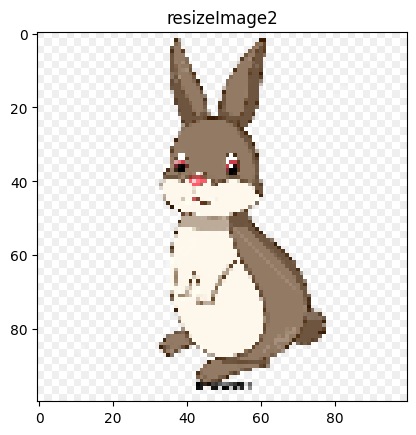

In [34]:
size=0
print("1.small\n2.medium\n3.big")
choice=int(input("Type the choice of size"))
if(choice==1):
    size=100
elif(choice==2):
    size=500
elif(choice==3):
    size=1000
imgResize=resize_img(img, size, size)
print("NewSize",imgResize.shape)
plt.title("resizeImage2")
plt.imshow(imgResize)

In [35]:
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


libpng warning: iCCP: known incorrect sRGB profile


OriginalSize (3036, 2235, 3)


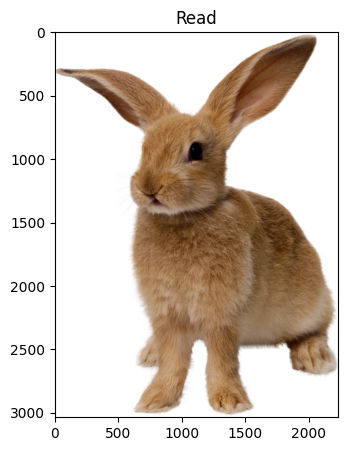

In [43]:
dir="conejo.png"
plt.figure(figsize=(5,5))
plt.title("Read")
Read=readIMG(dir)
plt.imshow(Read)

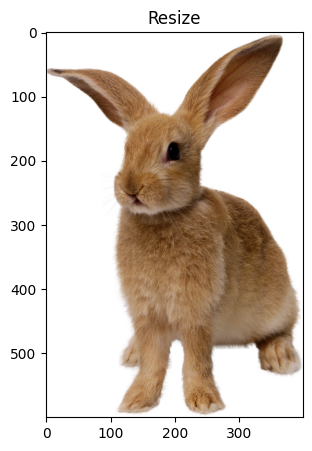

In [44]:
Resize4=resize_img(Read,400,600)
plt.figure(figsize=(5,5))
plt.title("Resize")
plt.imshow(Resize4)

Text(0.5, 1.0, 'Down')

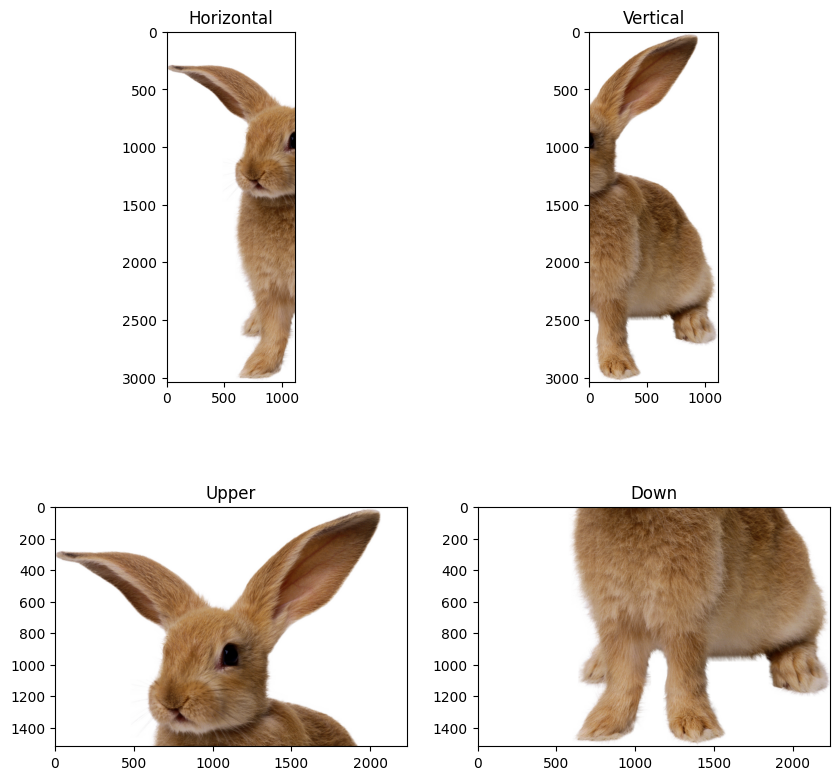

In [76]:
L,R,U,D=cut(Read)

f, ((ax1, ax2),(ax3,ax4))= plt.subplots(2, 2, figsize=(10,10))

ax1.imshow(L) 
ax1.set_title('Horizontal') 
ax2.imshow (R)
ax2.set_title("Vertical")
ax3.imshow (U)
ax3.set_title("Upper")
ax4.imshow (D)
ax4.set_title("Down")


Text(0.5, 1.0, 'Quadrant 4')

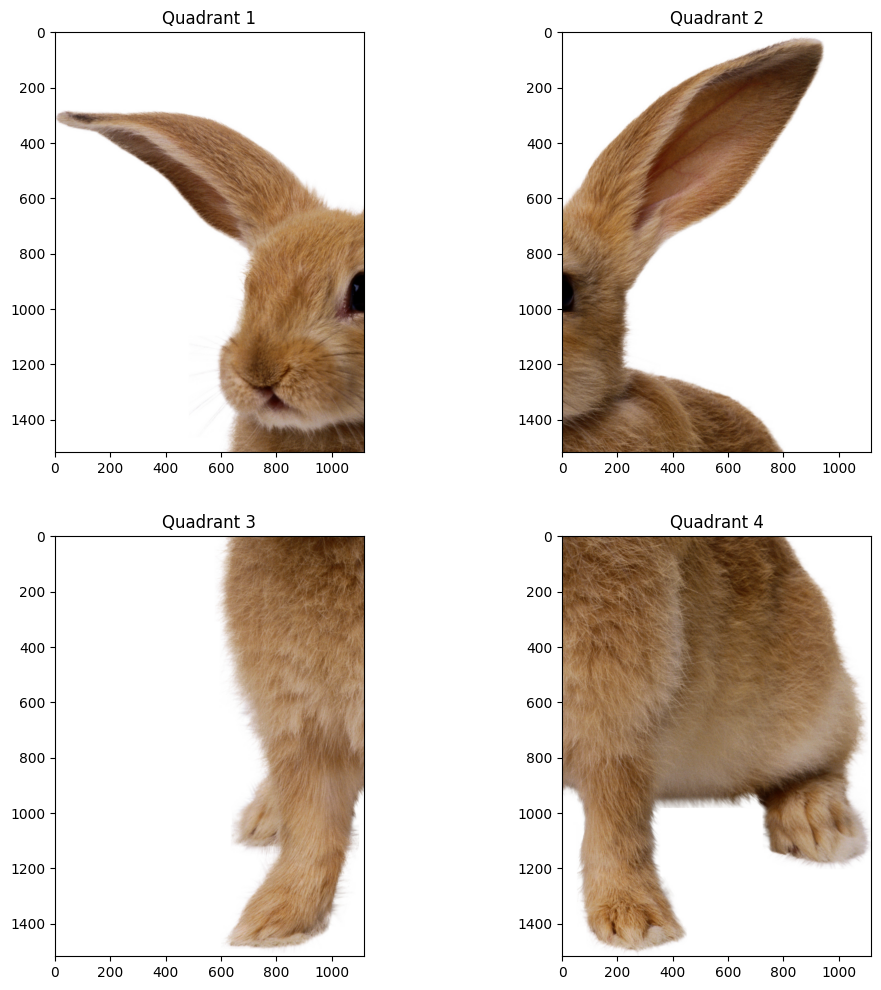

In [79]:
image=Read
height, width, _ = image.shape

# Divide the image into quadrants
quadrant1 = image[:height // 2, :width // 2]
quadrant2 = image[:height // 2, width // 2:]
quadrant3 = image[height // 2:, :width // 2]
quadrant4 = image[height // 2:, width // 2:]

# Display the quadrants using Matplotlib
plt.figure(figsize=(12, 12))

# Quadrant 1
plt.subplot(2, 2, 1)
plt.imshow(quadrant1)
plt.title("Quadrant 1")

# Quadrant 2
plt.subplot(2, 2, 2)
plt.imshow(quadrant2)
plt.title("Quadrant 2")

# Quadrant 3
plt.subplot(2, 2, 3)
plt.imshow(quadrant3)
plt.title("Quadrant 3")

# Quadrant 4
plt.subplot(2, 2, 4)
plt.imshow(quadrant4)
plt.title("Quadrant 4")